In [84]:
import os
from dotenv import load_dotenv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Training solutions dataframe
training_solutions = pd.read_excel("../../data/raw/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")
training_solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [86]:
# Categorical data dataframe
train_cat = pd.read_excel("../../data/raw/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [92]:
# Quantitative data dataframe
train_quant = pd.read_excel("../../data/raw/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
train_quant.head()


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [87]:
# Combine categorical training data with labels
combined_df = pd.merge(train_cat, training_solutions, on='participant_id')
combined_df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1


In [93]:
# Combine quantitative training data with labels
combined_df_q = pd.merge(train_quant, training_solutions, on='participant_id')
combined_df_q.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,1,5,0,5,1,0,10,NaN,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,6,8,7,8,10,4,5,NaN,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,2,8,5,7,6,4,9,8.239904,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,4,16,9,10,8,4,6,NaN,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,4,11,4,10,7,3,9,8.940679,1,1


In [88]:
category_mappings = {
    'PreInt_Demos_Fam_Child_Ethnicity': {0: 'Not Hispanic or Latino', 1: 'Hispanic or Latino', 2: 'Decline to specify', 3: 'Unknown'},
    'PreInt_Demos_Fam_Child_Race': {0: 'White/Caucasian', 1: 'Black/African American', 2: 'Hispanic', 3: 'Asian', 4: 'Indian',
                                     5: 'Native American Indian', 6: 'American Indian/Alaskan Native',
                                     7: 'Native Hawaiian/Other Pacific Islander', 8: 'Two or more races',
                                     9: 'Other race', 10: 'Unknown', 11: 'Choose not to specify'},
    'MRI_Track_Scan_Location': {1: 'Staten Island', 2: 'RUBIC', 3: 'CBIC', 4: 'CUNY'},
    'Basic_Demos_Study_Site': {1: 'Staten Island', 2: 'MRV', 3: 'Midtown', 4: 'Harlem', 5: 'SI RUMC'},
    'Barratt_Barratt_P1_Edu': {3: 'Less than 7th grade', 6: 'Junior high (9th grade)', 9: 'Partial high school', 12: 'High school graduate',
                               15: 'Partial college', 18: 'College education', 21: 'Graduate degree'},
    'Barratt_Barratt_P2_Edu': {3: 'Less than 7th grade', 6: 'Junior high (9th grade)', 9: 'Partial high school', 12: 'High school graduate',
                               15: 'Partial college', 18: 'College education', 21: 'Graduate degree'},
    'Barratt_Barratt_P1_Occ': {0: 'Homemaker', 5: 'Day laborer', 10: 'Garbage collector', 15: 'Painter', 20: 'Mechanic',
                               25: 'Machinist', 30: 'Supervisor', 35: 'Nurse', 40: 'Engineer', 45: 'Physician'},
    'Barratt_Barratt_P2_Occ': {0: 'Homemaker', 5: 'Day laborer', 10: 'Garbage collector', 15: 'Painter', 20: 'Mechanic',
                               25: 'Machinist', 30: 'Supervisor', 35: 'Nurse', 40: 'Engineer', 45: 'Physician'}
}

In [89]:
# Apply label mappings
data = combined_df.copy()
data['ADHD_Outcome'] = data['ADHD_Outcome'].map({0: 'Other/None', 1: 'ADHD'})
data['Sex_F'] = data['Sex_F'].map({0: 'Male', 1: 'Female'})

## Stacked Bar Chart Analysis (ADHD)
### **1. Enrollment Year (Basic_Demos_Enroll_Year by ADHD)**
   - Number of participants peaked around 2018.
   - The ADHD and Other/None groups are mostly proportionally consistent over time, except in 2016 where it is 50/50.

### **2. Study Site (Basic_Demos_Study_Site by ADHD)**
   - Most participants were from Midtown and Staten Island.
   - Barely anyone from NYU and Harlem.

### **3. Ethnicity (PreInt_Demos_Fam_Child_Ethnicity by ADHD)**
   - A significant proportion identified as "Not Hispanic or Latino."
   - The "Hispanic or Latino" category has a smaller but notable representation.

### **4. Race (PreInt_Demos_Fam_Child_Race by ADHD)**
   - Most participants identified as White/Caucasian.
   - Black/African American, Hispanic, and Two or More Races had smaller but notable representation.
   - ADHD has the highest proportion among caucasians.

### **5. MRI Scan Location (MRI_Track_Scan_Location by ADHD)**
   - Most scans were done at RUBIC.
   - The ADHD and Other/None proportions look similar across scan locations.

### **6. Parent Education Level (Barratt_Barratt_P1_Edu & Barratt_Barratt_P2_Edu by ADHD)**
   - Most parents had college or graduate degrees.
   - Very few had an education below high school level.

### **7. Parent Occupation (Barratt_Barratt_P1_Occ & Barratt_Barratt_P2_Occ by ADHD)**
   - The most common occupation was homemakers.
   - Certain professions like engineers, nurses physicians, and homemakers had higher counts.
   - The ADHD and Other/None distributions look comparable.

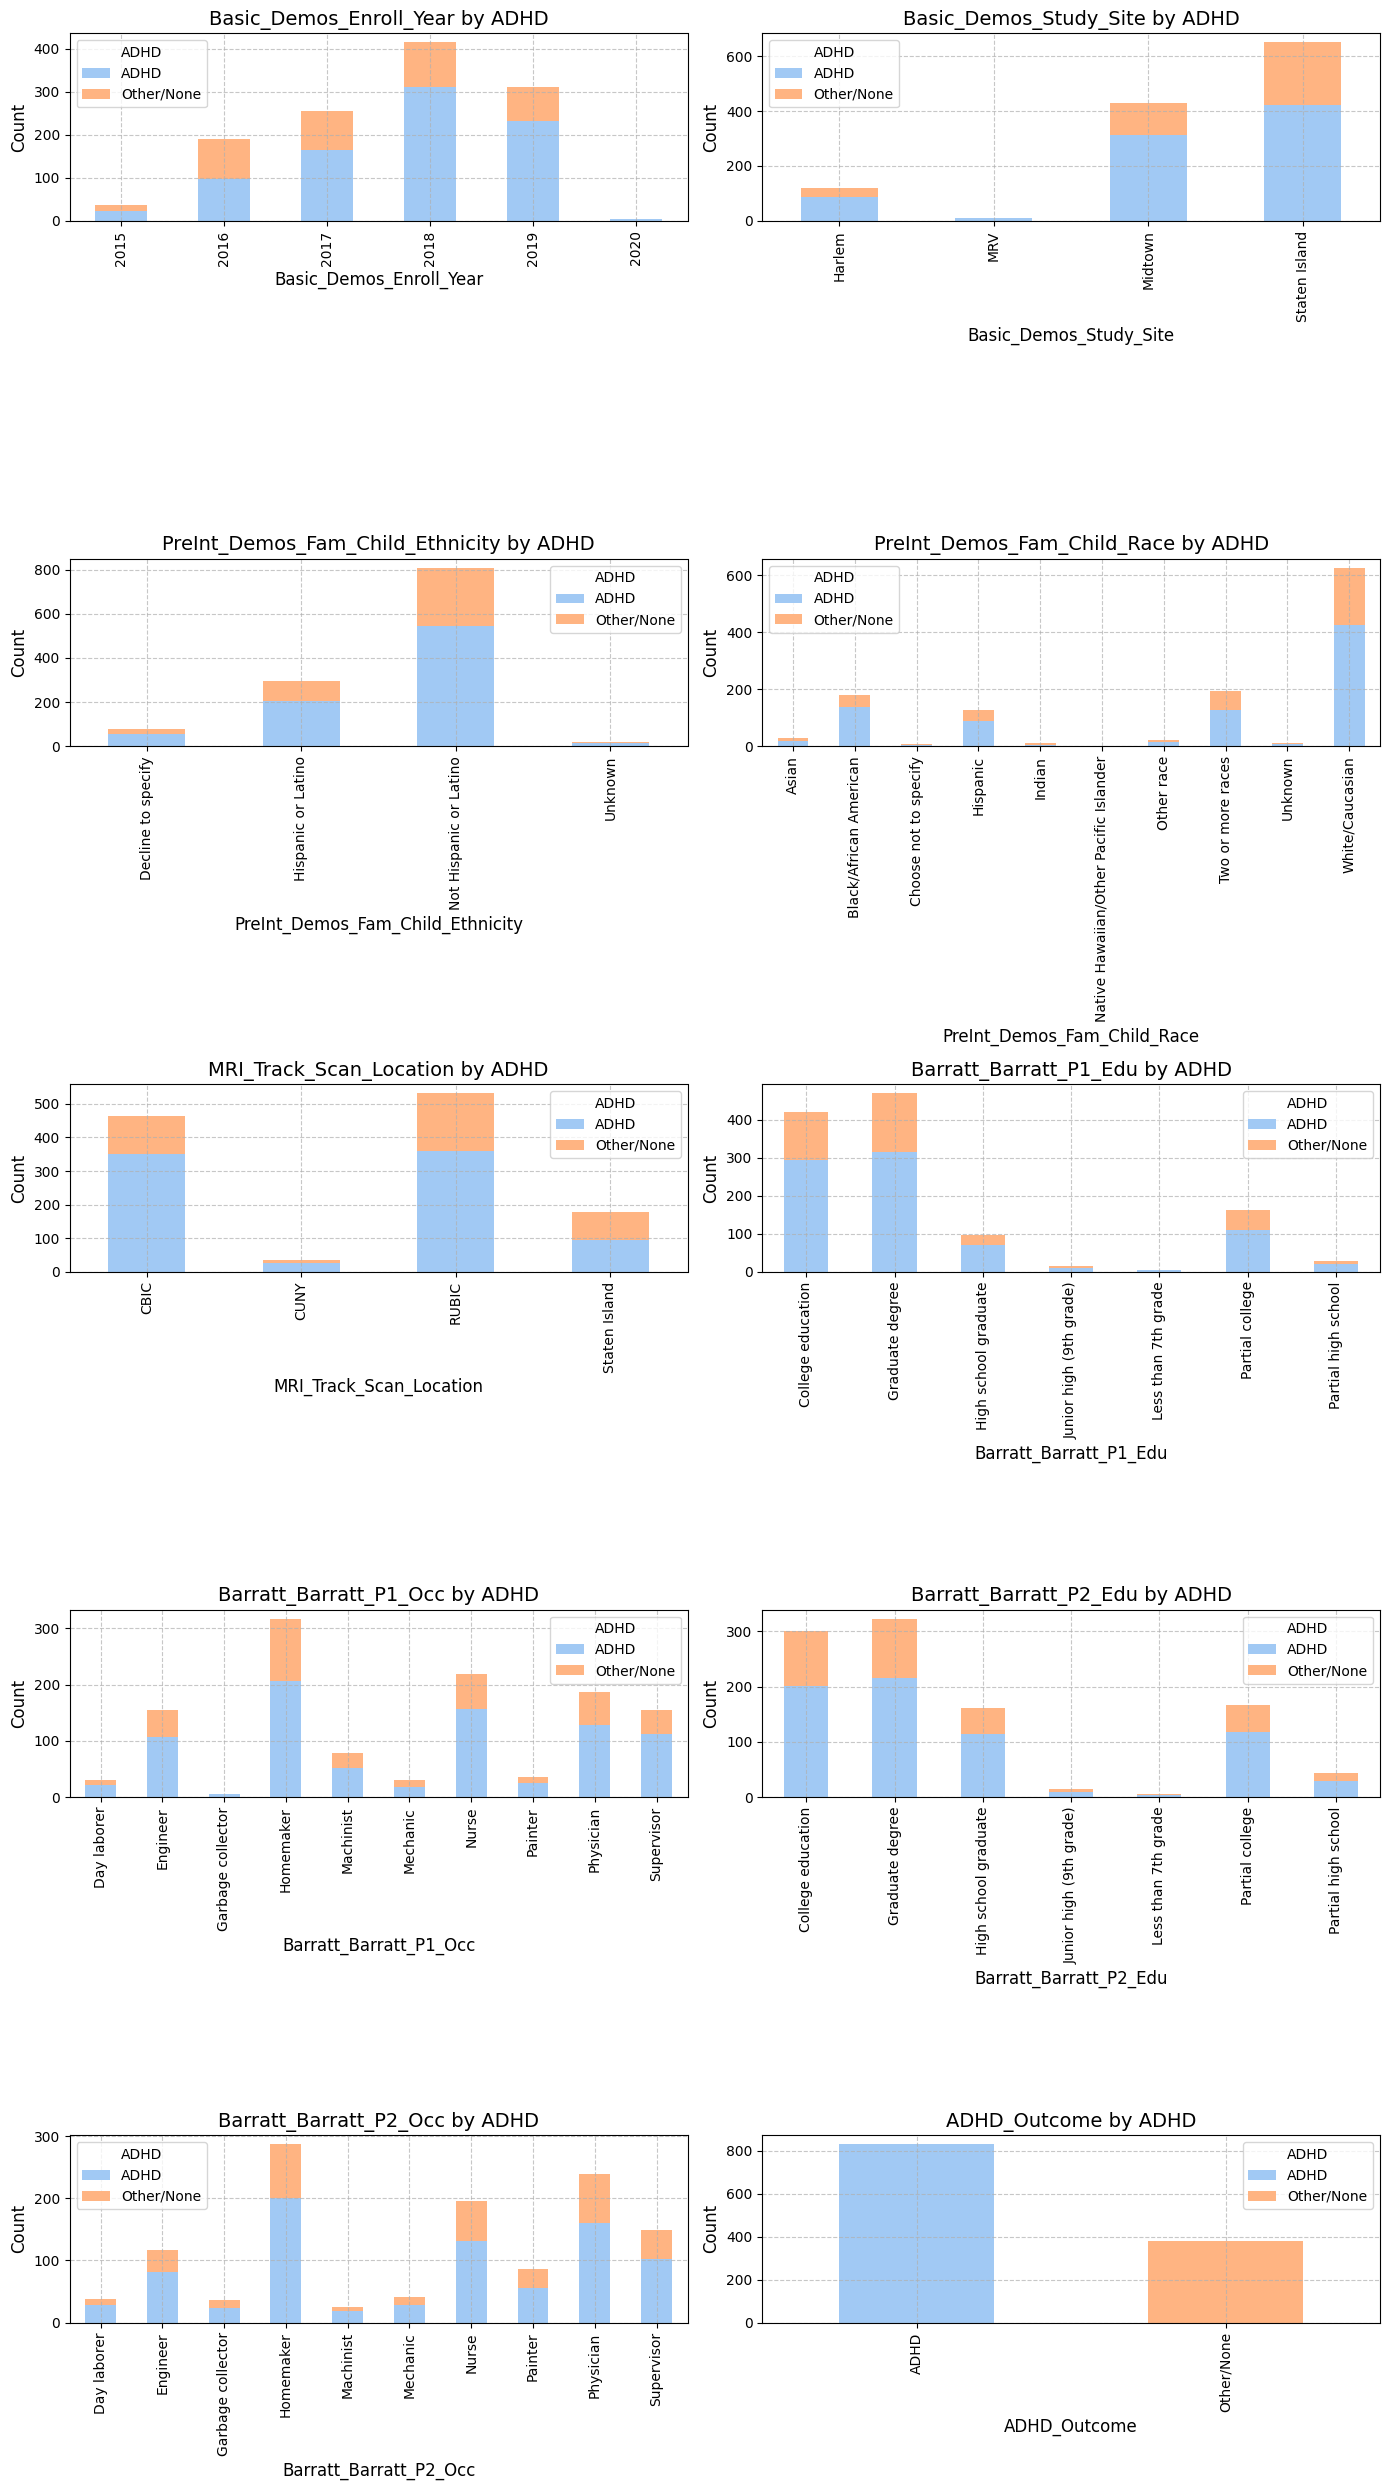

In [90]:
# mapping categorical columns
for col, mapping in category_mappings.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)

colors = sns.color_palette("pastel", n_colors=len(data['ADHD_Outcome'].unique()))

# subplots
num_columns = len(data.columns[1:-1])
fig, axes = plt.subplots(nrows=(num_columns // 2) + (num_columns % 2), ncols=2, figsize=(14, 5 * ((num_columns // 2) + (num_columns % 2))))
axes = axes.flatten()

# stacked bar charts
for i, column in enumerate(data.columns[1:-1]):
    ax = axes[i]
    data.groupby([column, 'ADHD_Outcome'])[column].count().unstack().plot(
        kind='bar', stacked=True, ax=ax, color=colors
    )
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{column} by ADHD', fontsize=14)
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.legend(title="ADHD", fontsize=10)

plt.tight_layout()
plt.show()

## Lindsey's Stacked Bar Chart Analysis (Sex) 
### **1. Enrollment Year (Basic_Demos_Enroll_Year by Sex)**
   - Number of participants peaked around 2018.
   Males seem to be enrolled more than women.
   - The number of males enrolled proportionally increases over time, starting about 50/50 in 2015 and increasing to probably 70/30 in 2018 & 2019.

### **2. Study Site (Basic_Demos_Study_Site by Sex)**
   - Harlem seems to be a pretty even 50/50 split, whereas Midtown and Staten Island appear to be around 70/30, with a majority of males.
   Majority from Midtown and Staten Island.

### **3. Ethnicity (PreInt_Demos_Fam_Child_Ethnicity by Sex)**
   - Decline, Unknown, and Hispanic or Latino have pretty even male/female splits.
   Not Hispanic or Latino (the largest category) has about a 70/30 split with more males.

### **4. Race (PreInt_Demos_Fam_Child_Race by Sex)**
   - Most participants identified as White/Caucasian, with about a 65/35 split in favor of males.
   - Regardless of racial group, more participants identify as male than female.
   - Other notable groups (two or more races, hispanic, black/african american) still have unbalanced proportions, with about 70/30 in favor of males.

### **5. MRI Scan Location (MRI_Track_Scan_Location by Sex)**
   - Very few scans done at CUNY, but the male/female split at CUNY is very notable: almost 90 %(or 95, unsure/hard to tell) are male.
   - Staten Island appears to be 50/50.
   - CBIC and RUBIC have about a 65/35 split in favor of males.

### **6. Parent Education Level (Barratt_Barratt_P1_Edu & Barratt_Barratt_P2_Edu by Sex)**
   - Gender distribution across parent education level looks pretty consistent across all levels, with a favor in males roughly 60/40.
   - Partial high school looks to be about evenly split, all the rest appear to have more male splits.

### **7. Parent Occupation (Barratt_Barratt_P1_Occ & Barratt_Barratt_P2_Occ by Sex)**
   - The most common occupation was homemakers.
   - Certain professions like engineers, nurses physicians, and homemakers had higher counts.
   - The gender distributions between professions look comparable, with noticably more male counts.

### **8. ADHD by Sex (ADHD_Outcome by Sex)**
  - ADHD is higher than Other/None.
  - For ADHD, there is a higher distribution of males than females, with roughly a 70/30 split in favor of males.
  - For Other/None, the split appears to be roughly even between genders.

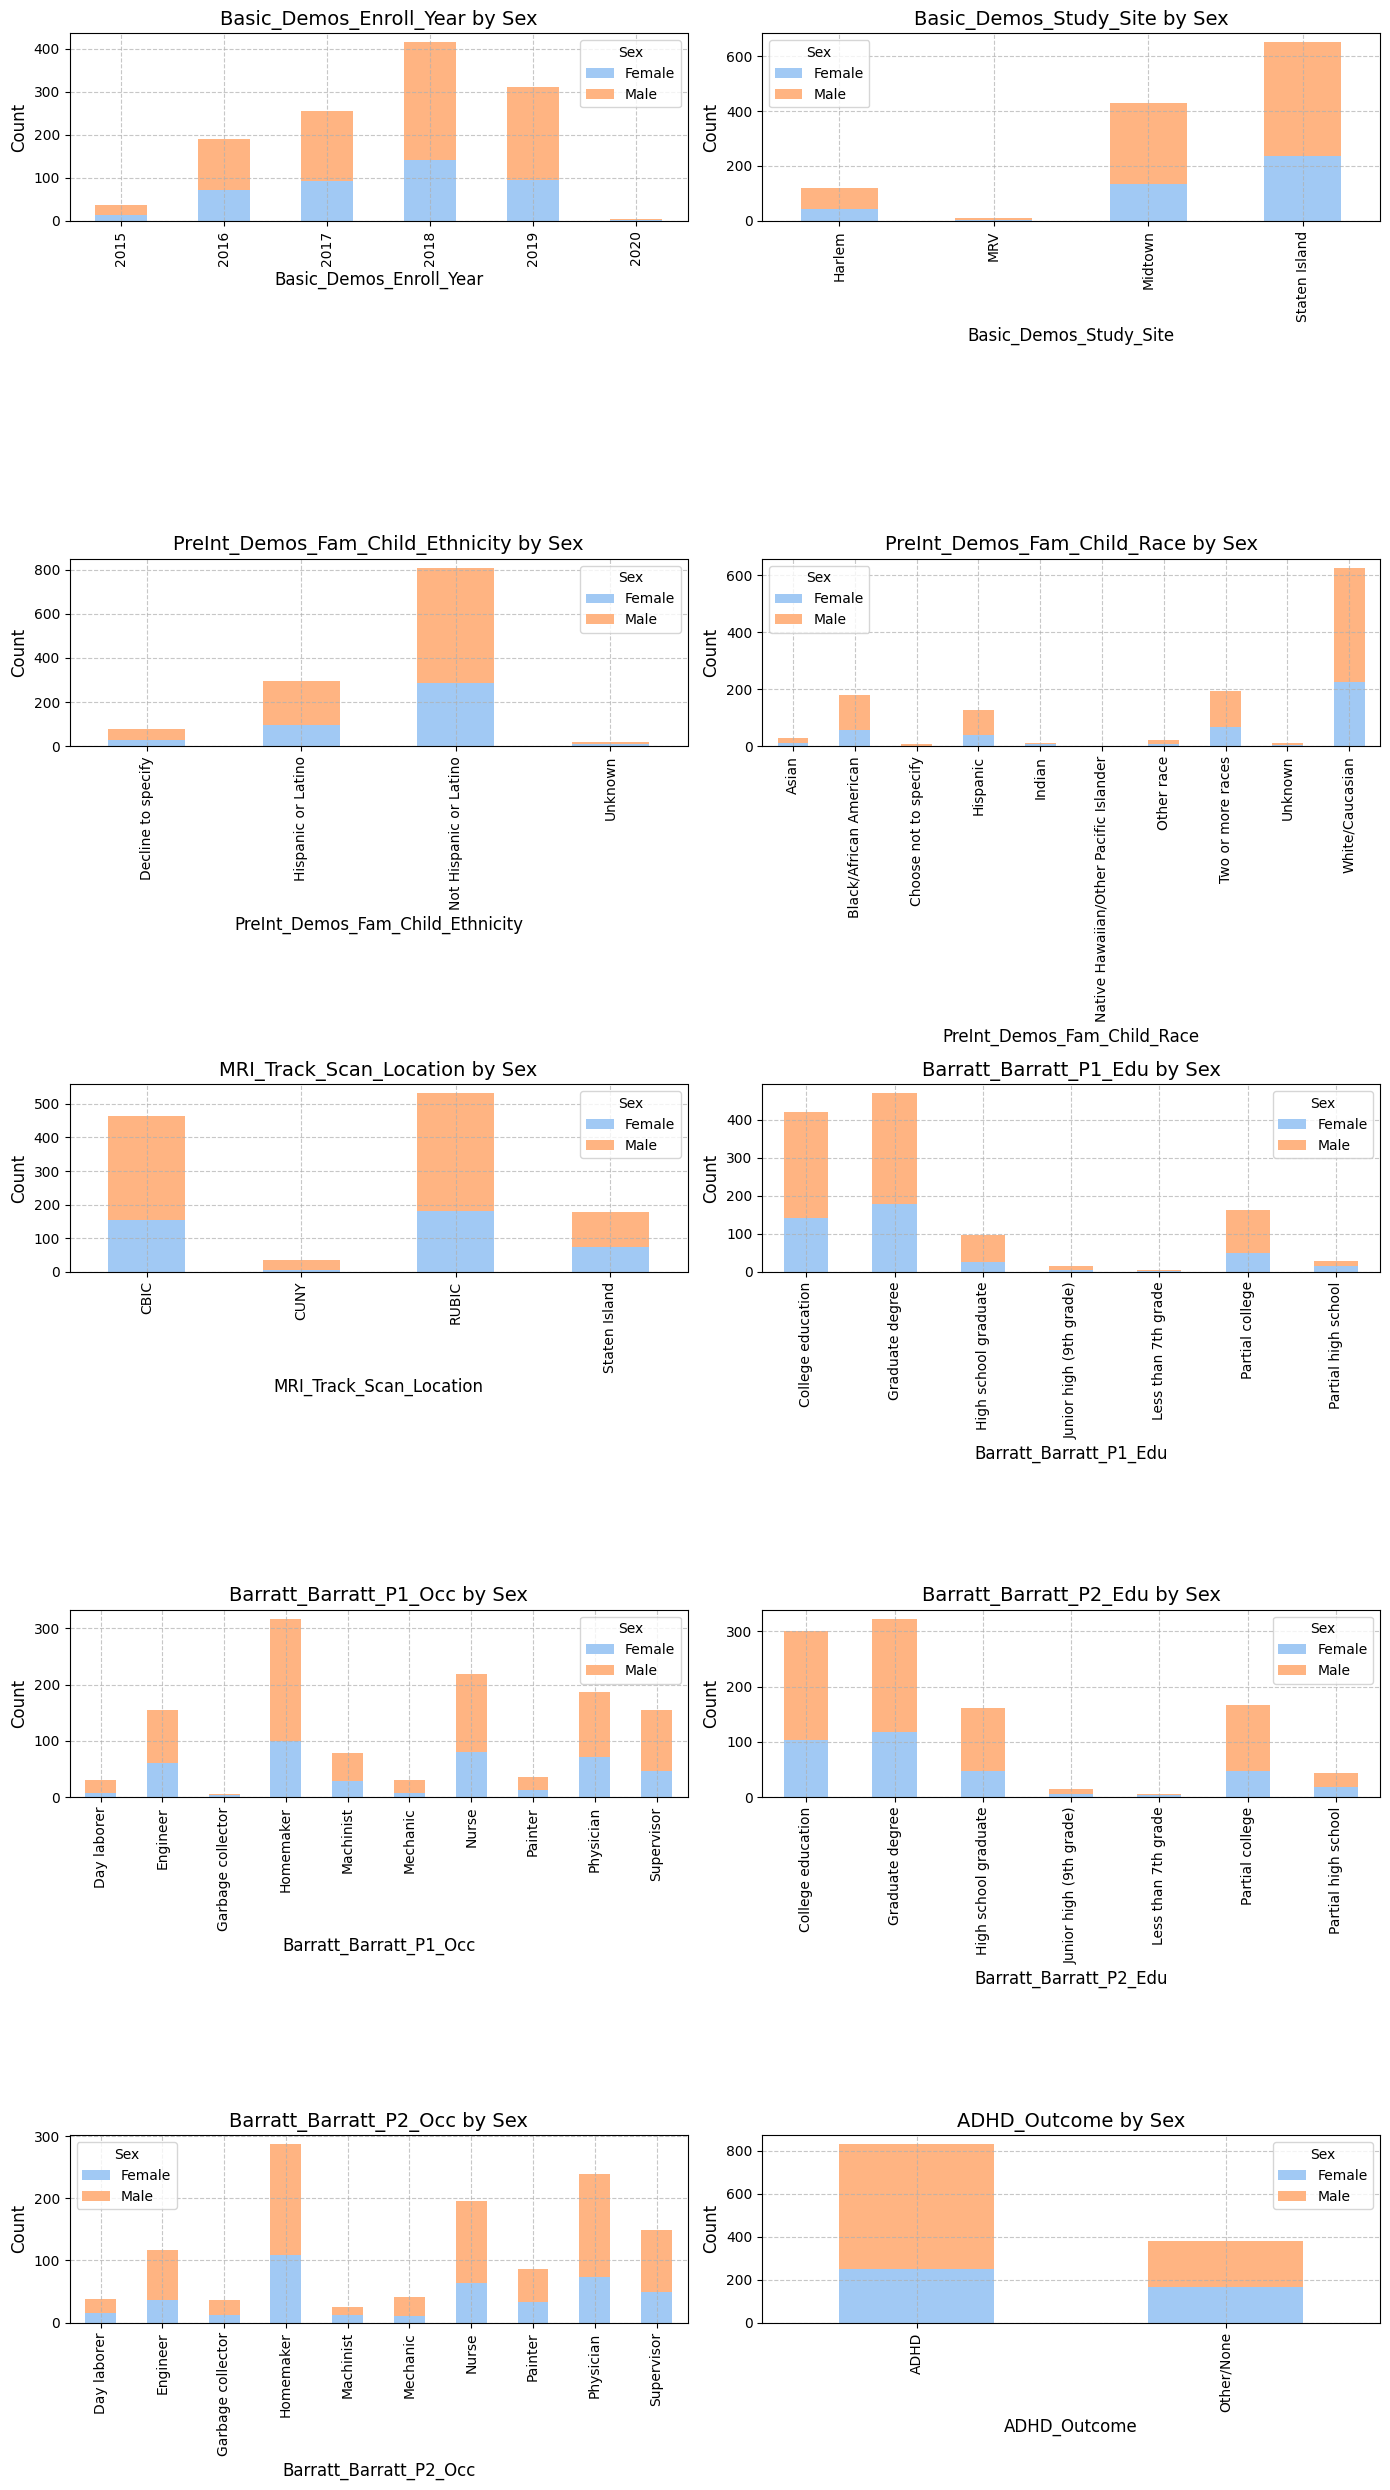

In [91]:
colors = sns.color_palette("pastel", n_colors=len(data['Sex_F'].unique()))

# subplots
num_columns = len(data.columns[1:-1])
fig, axes = plt.subplots(nrows=(num_columns // 2) + (num_columns % 2), ncols=2, figsize=(14, 5 * ((num_columns // 2) + (num_columns % 2))))
axes = axes.flatten()

# stacked bar charts
for i, column in enumerate(data.columns[1:-1]):
    ax = axes[i]
    data.groupby([column, 'Sex_F'])[column].count().unstack().plot(
        kind='bar', stacked=True, ax=ax, color=colors
    )
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{column} by Sex', fontsize=14)
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.legend(title="Sex", fontsize=10)

plt.tight_layout()
plt.show()

## ADHD and Numerical Variables
### **1. Color Vision Score (ColorVision_CV_Score by ADHD)**
   - Very small counts for 0-2, basically no counts for 3-9, very small counts for 10-12.
   - Slightly significant counts for 13, with a proportion of roughly 85/25, with a larger count of ADHD as opposed to Other/None
   - A score of 14 is extremely prevalent and almost the norm, with about 70% of participants having ADHD.

### **2. Corporal Punishment Score (APQ_P_APQ_P_CP by ADHD)**
   - Peak score of 3, with decreasing counts from 4-9.
   - Perhaps an outlier at 0.
   - Higher counts of ADHD than Other/None across all scores.

### **3. Inconsistent Discipline Score (APQ_P_APQ_P_ID by ADHD)**
   - Roughly bell-curved/normally distributed. Maybe slightly right skewed but normal for the most part.
   - Median appears to be between 12 and 16.
   - Higher counts of ADHD than Other/None across all scores.

### **4. Involvement Score (APQ_P_APQ_P_INV by ADHD)**
   - Roughly bell-curved/normally distributed. slightly left skewed.
   - Median appears to be between 39 and 41.
   - Higher counts of ADHD than Other/None across all scores.

### **5. Other Discipline Practices Score (APQ_P_APQ_P_OPD by ADHD)**
   - Roughly bell-curved/normally distributed.
   - Median appears to be between 17 and 18.
   - Higher counts of ADHD than Other/None across all scores.

### **6. Poor Monitoring/Supervision Score(APQ_P_APQ_P_PM by ADHD)**
   - Right skewed.  
   - Peaks at 10, decreases, peaks again at 15, then decreases.  
   - Higher counts of ADHD than Other/None across all scores.

### **7. Positive Parenting Score(APQ_P_APQ_P_PP by ADHD)**
   - Left skewed
   - Higher counts of ADHD than Other/None across all scores, but the proportion gets more even as scores increase (lower scores are mainly associated with ADHD, while higher scores have a weaker connection to ADHD)
   - Peak of 28.

### **8. Conduct Problems Scale (SDQ_SDQ_Conduct_Problems by ADHD)**
  - Right skewed.
  - Peak of 0, with an event split of ADHD and None/Other.
  - As scores increase, ADHD counts increase and Other/None decrease.

### **9. Total Difficulties Scale (SDQ_SDQ_Difficulties_Total by ADHD)**
   - Right Skewed.
   - Lower scores have lower counts of ADHD, and higher scores have higher counts of ADHD.
   - It appears that as the difficulty score increases, so does the prevalnce of ADHD.

### **10. Emotional Problems Scale (SDQ_SDQ_Emotional_Problems by ADHD)**
   - Right Skewed.
   - Lower scores have lower counts of ADHD, and higher scores have higher counts of ADHD.
   - It appears that as the emotional problems score increases, so does the prevalnce of ADHD.

### **11. Externalizing Score (SDQ_SDQ_Externalizing by ADHD)**
   - Right Skewed.
   - Lower scores have lower counts of ADHD, and higher scores have higher counts of ADHD.
   - It appears that as the externalizing score increases, so does the prevalnce of ADHD.

### **12. Generating Impact Score (SDQ_SDQ_Generating_Impact by ADHD)**
   - Normally distributed but significant peak at score 0, with a high proportion of no ADHD.
  - Lower scores have lower counts of ADHD, and higher scores have higher counts of ADHD.
   - It appears that as the impact score increases, so does the prevalnce of ADHD.

### **13. Hyperactivity Scale (SDQ_SDQ_Hyperactivity by ADHD)**
   - Left Skewed.
   - Peak of 5.
   - As hyperactivity increases, so does the prevalence of ADHD.

### **14. Internalizing Score (SDQ_SDQ_Internalizing by ADHD)**
   - Right Skewed.
   - Peak of 3.
   - As score increases, so does the prevalence of ADHD.


### **15. Peer Problems Scale (SDQ_SDQ_Peer_Problems by ADHD)**
   - Right Skewed.
   - Peak of 0, with a roughly even distribution of ADHD vs Other/None.
   - As scale increases, so does the prevalence of ADHD.
  
### **16. Prosocial Scale (SDQ_SDQ_Prosocial by ADHD)**
   - Left skewed.
   - Peak of 10, with a roughly even distribution of ADHD vs Other/None.
   - As scale increases, the prevalence of ADHD decreases.
  
### **17. Overall ADHD (ADHD_Outcome by ADHD)**
  - More counts of ADHD than Other/None.
  - Roughly 800+ ADHD, and about 390 Other/None.

### **18. Overall Sex and ADHD (Sex_F by ADHD)**
   - More counts for males (ROUND 800) than females (around 405).
   - Male distribution looks about 70/30, with more ADHD.
   - Female looks about 60/40, with more ADHD.

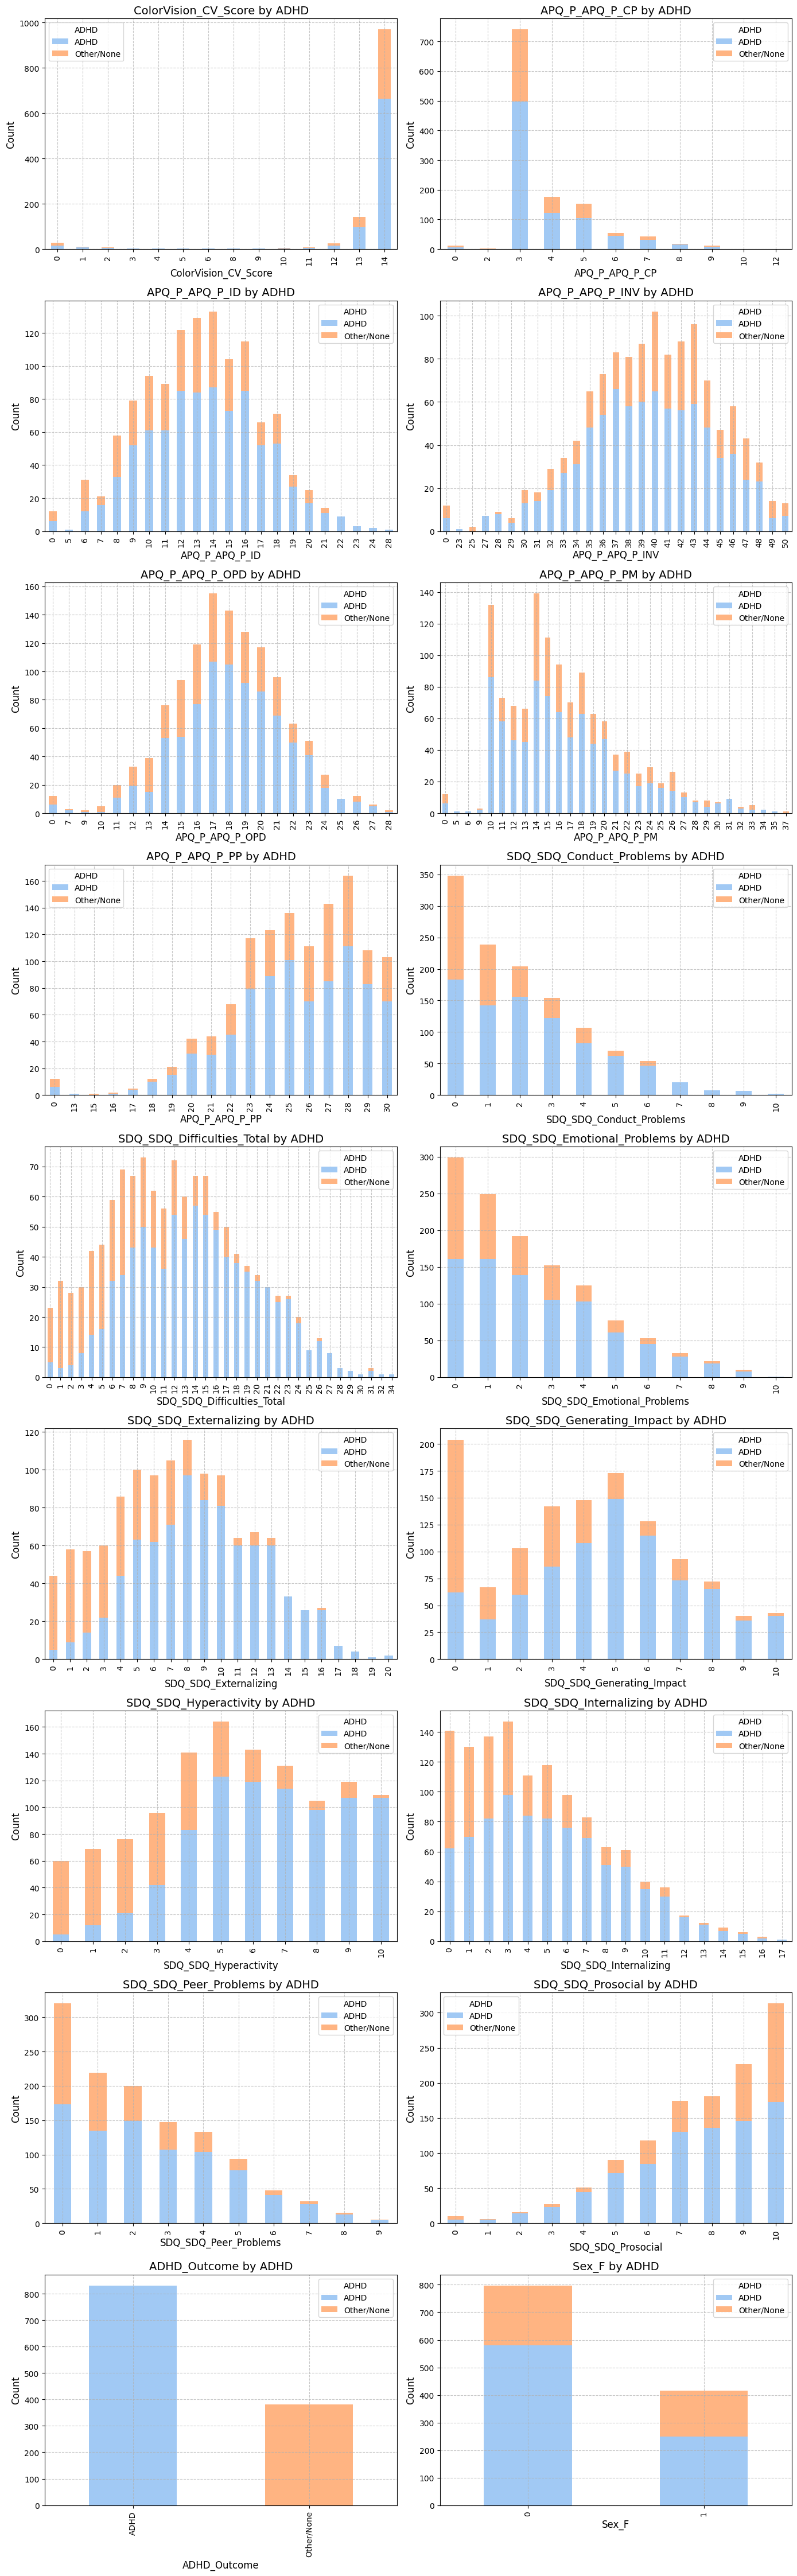

In [95]:
# columns to exclude
exclude_columns = {'participant_id', 'EHQ_EHQ_Total', 'MRI_Track_Age_at_Scan'}

columns_to_plot = [col for col in combined_df_q.columns if col not in exclude_columns]

colors = sns.color_palette("pastel", n_colors=len(combined_df_q['ADHD_Outcome'].unique()))

# subplots
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_columns // 2) + (num_columns % 2), ncols=2, figsize=(14, 5 * ((num_columns // 2) + (num_columns % 2))))
axes = axes.flatten()

# stacked bar charts
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    data = combined_df_q.copy()
    data['ADHD_Outcome'] = data['ADHD_Outcome'].map({0: 'Other/None', 1: 'ADHD'})

    data.groupby([column, 'ADHD_Outcome'])[column].count().unstack().plot(
        kind='bar', stacked=True, ax=ax, color=colors
    )
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{column} by ADHD', fontsize=14)
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.legend(title="ADHD", fontsize=10)

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Sex and Numerical Variables
### **1. Color Vision Score (ColorVision_CV_Score by Sex)**
- Very small counts for 0-2, basically no counts for 3-9, very small counts for 10-12.
- Slightly significant counts for 13, with a proportion of roughly 85/25, with a larger count of male as opposed to female.
- A score of 14 is extremely prevalent and almost the norm, with about 70% of participants being male.

### **2. Corporal Punishment Score (APQ_P_APQ_P_CP by Sex)**
- Peak score of 3, with decreasing counts from 4-9.
- Higher counts of male than female across all scores.

### **3. Inconsistent Discipline Score (APQ_P_APQ_P_ID by Sex)**
- Roughly bell-curved/normally distributed. Maybe slightly left skewed but normal for the most part.
- Median appears to be between 12 and 16.
- Higher counts of male than female across all scores.

### **4. Involvement Score (APQ_P_APQ_P_INV by Sex)**
- Left skewed.
- Median appears to be 16.
- Higher counts of male than female across all scores.

### **5. Other Discipline Practices Score (APQ_P_APQ_P_OPD by Sex)**
- Normally distributed.
- Median appears to be 40.
- Higher counts of male than female across all scores.

### **6. Poor Monitoring/Supervision Score(APQ_P_APQ_P_PM by Sex)**
- Right skewed.
- Median appears to be between 15 and 17, with another peak at 10.
- Higher counts of male than female across all scores.

### **7. Positive Parenting Score(APQ_P_APQ_P_PP by Sex)**
- Left skewed.
- Median appears to be 28.
- Higher counts of male than female across all scores.

### **8. Conduct Problems Scale (SDQ_SDQ_Conduct_Problems by Sex)**
- Right skewed.
- Peak of 0, with an event split of male and female.
- As scores increase, male counts increase and female decrease.

### **9. Total Difficulties Scale (SDQ_SDQ_Difficulties_Total by Sex)**
- Slightly right-skewed.
- More prevalency in males all around.

### **10. Emotional Problems Scale (SDQ_SDQ_Emotional_Problems by Sex)**
- Right skewed.
- More prevalency in males, but as scores increase male counts increase.

### **11. Externalizing Score (SDQ_SDQ_Externalizing by Sex)**
- Slightly right skewed.
- More prevalency in males all around.

### **12. Generating Impact Score (SDQ_SDQ_Generating_Impact by Sex)**
   - Normally distributed but significant peak at score 0, with a high proportion of males.
  - Proportion of male vs female remains fairly constant, with a higher male count with higher scores.

### **13. Hyperactivity Scale (SDQ_SDQ_Hyperactivity by Sex)**
   - Left Skewed.
   - Peak of 5.
   - As hyperactivity increases, so do the counts of male subjects.

### **14. Internalizing Score (SDQ_SDQ_Internalizing by Sex)**
   - Right Skewed.
   - Peak of 3.
   - Fairly constant distribtuion of genders, with more male counts than females.

### **15. Peer Problems Scale (SDQ_SDQ_Peer_Problems by Sex)**
   - Right Skewed.
   - Peak of 0, with more male counts than female counts throughout the scores.
  
### **16. Prosocial Scale (SDQ_SDQ_Prosocial by Sex)**
   - Left skewed.
   - Peak of 10, with a constant distribution of more males than females.
   - As the scale increases, the counts of females increase.

### **17. Overall Sex and ADHD (Sex_F by ADHD)**
   - More counts for males (ROUND 800) than females (around 405).
   - Male distribution looks about 70/30, with more ADHD.
   - Female looks about 60/40, with more ADHD.


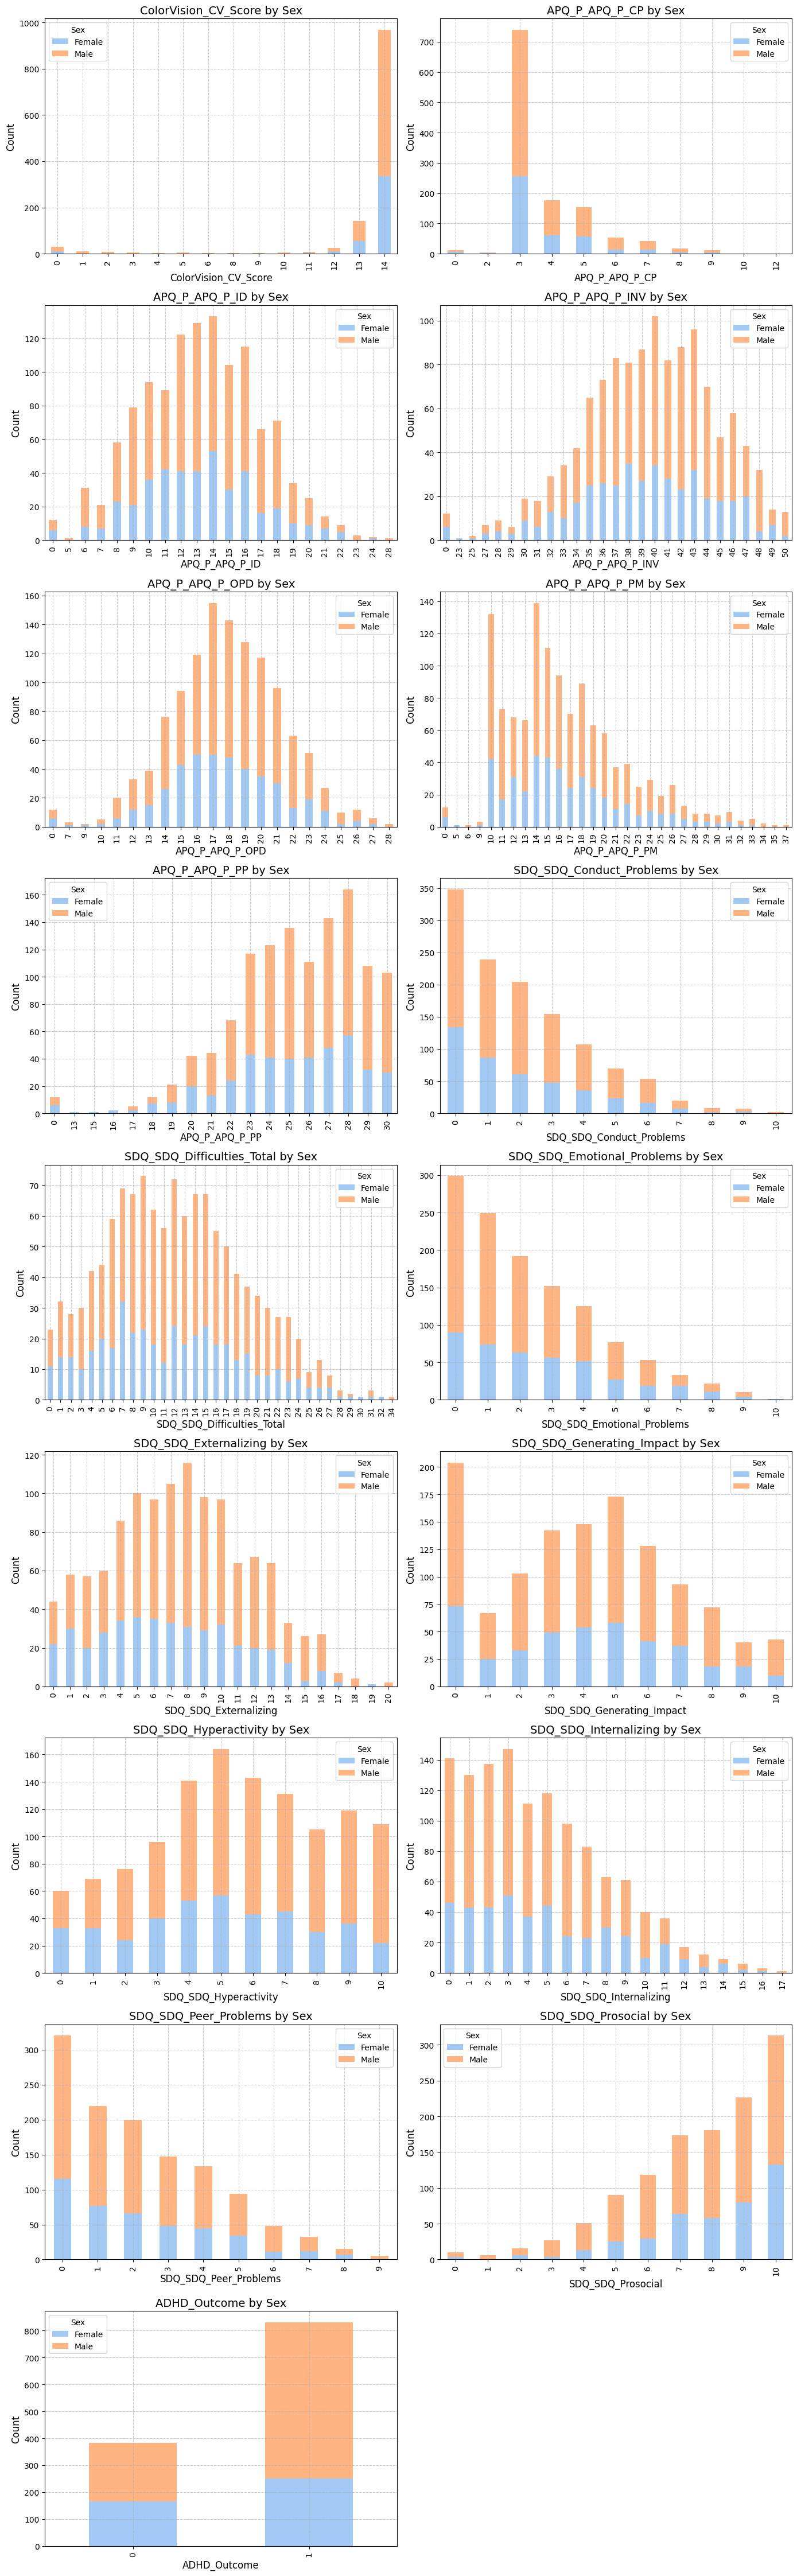

In [94]:
# columns to exclude
exclude_columns = {'participant_id', 'EHQ_EHQ_Total', 'MRI_Track_Age_at_Scan'}

# filtering out excluded columns
columns_to_plot = [col for col in combined_df_q.columns[1:-1] if col not in exclude_columns]

colors = sns.color_palette("pastel", n_colors=len(combined_df_q['Sex_F'].unique()))

# subplots
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_columns // 2) + (num_columns % 2), ncols=2, figsize=(14, 5 * ((num_columns // 2) + (num_columns % 2))))
axes = axes.flatten()

# stacked bar charts
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    data = combined_df_q.copy()
    data['Sex_F'] = data['Sex_F'].map({0: 'Male', 1: 'Female'})

    data.groupby([column, 'Sex_F'])[column].count().unstack().plot(
        kind='bar', stacked=True, ax=ax, color=colors
    )
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{column} by Sex', fontsize=14)
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.legend(title="Sex", fontsize=10)

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()